## Predicting Customer Churn in Python

Churn quantifies the number of customers who have unsubscribed or canceled their service contract.
It is very expensive to win them back once lost, additionally they will not do the best word to mouth marketing if unsatisfied. 

We look at data from customers that already have churned (response) and their characteristics / behavior (predictors) before the churn happened. By fitting a statistical model that relates the predictors to the response, we will try to predict the response for existing customers


## The Dataset
We take an available dataset you can find on IBMs retention programs: Telcom Customer Churn Dataset. The raw dataset contains more than 7000 entries and 21 features. All entries have several features and of course a column stating if the customer has churned or not.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## Conclusions

According with the findings of the Logistic Regression model that has an 80% accuracy, we noticed that the following features are the strongest key drivers:

- Features that having then increase the probability of a customer to churn are PaperlessBilling and SeniorCitizen.

- Features that having then decrease the probability of a customer to churn are Contract,PhoneService, TechSupport, OnlineSecurity, and Dependents 

## 1. Loading and viewing the dataset

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
- The raw data contains 7043 rows (customers) and 21 columns (features).
- The “Churn” column is our target.
- We see that 26,5% Of the total amount of customer churn. 

In [109]:
## Import packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline


# Loading the CSV with pandas
data = pd.read_csv('/Users/jay/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


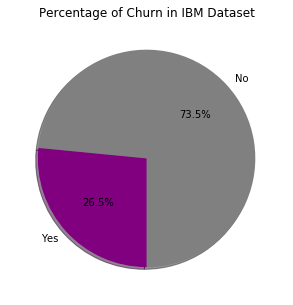

In [110]:
# Plotting the target variable
sizes = data['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5

# Plot
labels= ['No', 'Yes']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in IBM Dataset')
plt.show()

## 2. Data Preparation and Feature Engineering
### Dropping irrelevant data

There may be data included that is not needed to improve our results. 
Best is that to identify by logic thinking or by creating a correlation matrix. 
In this data set we have the customerID for example. As it does not influence our predicted outcome, we drop it.


In [111]:
## Dropping CustomerID
data.drop(['customerID'], axis=1, inplace=True)

### Handle Missing Values
The values can be identified by the “.isnull()” function in pandas for example. 
After identifying the null values it depends on each case if it makes sense to fill the missing value for example with the mean, median or the mode, or in case there is enough training data drop the entry completely. 

The dataset does not present null values.

In [112]:
## Identify missing values
data.isnull().sum()
#pd.Series([np.nan]).sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Converting Numerical Features From Object (Label Encoding)
- we can see that the the column TotalCharges are numbers, but actually in the object format. Our machine learning model can only work with actual numeric data. Therefore with the “to_numeric” function we can change the format and prepare the data for our machine learning model

In [113]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [121]:
# Converting 'TotalCharges' into numerical value 

# I used 0 to replace anything that isn't a number
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0).astype(float)

# float(df['a'][1]) # works for one index
# data['TotalCharges'].astype(dtype=np.float64)
# data['TotalCharges'].astype(float)
# pd.to_numeric(data['TotalCharges']) # Unable to parse string " " at position 488


In [122]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [123]:
## Converting categorical data into numerical data

# Import LabelEncoder
from sklearn import preprocessing

# Instantiate LabelEncoder
le = preprocessing.LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data.columns:
    # Compare if the dtype is object
    if data[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col])
    print(le.classes_)
    

['Female' 'Male']
['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'No phone service' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['No' 'Yes']


In [125]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


### 3. Splitting the dataset

First our model needs to be trained, second our model needs to be tested. Therefore it is best to have two different dataset. As for now we only have one, it is very common to split the data accordingly. X is the data with the independent variables, Y is the data with the dependent variable. The test size variable determines in which ratio the data will be split. It is quite common to do this in a 80 Training / 20 Test ratio.

In [129]:
data["Churn"] = data["Churn"].astype(int)
y = data["Churn"].values
X = data.drop(labels = ["Churn"],axis = 1)

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(5634, 19) (1409, 19) (5634,) (1409,)


## 4. Logistic Regression & Model Testing

Logistic Regression is one of the most used machine learning algorithm and mainly used when the dependent variable (here churn 1 or churn 0) is categorical. 
- Step 1. Let’s Import the model we want to use from sci-kit learn
- Step 2. We make an instance of the Model
- Step 3. Is training the model on the training data set and storing the information learned from the data

In [131]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [132]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7998580553584103


The score show us that in 80% of the cases our model predicted the right outcome for our binary classification problem. That’s considered quite good for a first run, 

**Finding the independent variables have to most influence on our predicted outcome**

So with the final objective to reduce churn and take the right preventing actions in time, we want to know which independent variables have to most influence on our predicted outcome. Therefore we set the coefficients in our model to zero and look at the weights of each variable.

In [133]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

PaperlessBilling    0.460297
SeniorCitizen       0.297694
InternetService     0.084600
MultipleLines       0.072481
Partner             0.017786
PaymentMethod       0.017722
MonthlyCharges      0.016387
StreamingTV         0.014864
TotalCharges        0.000423
StreamingMovies    -0.016503
gender             -0.028592
tenure             -0.068261
DeviceProtection   -0.089845
OnlineBackup       -0.171168
Dependents         -0.214345
OnlineSecurity     -0.216317
TechSupport        -0.232791
PhoneService       -0.670950
Contract           -0.732690
dtype: float64

A positive value has a positive impact on our predicted variable. A good example is “SeniorCitizen”: The positive relation to churn means that having this type of contract also increases the probability of a customer to churn. On the other hand that “PhoneService” is in a highly negative relation to the predicted variable, which means that customers with this type of contract are very unlikely to churn. 